# **Project - Dynamic Pricing for Urban Parking Lots**

# Installing Bokeh Library for Real-Time stream Data

In [1]:
! pip install pathway bokeh --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.6/777.6 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.4/318.4 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.8/985.8 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Importing Basic Libraries

In [2]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime

import pathway as pw
import bokeh.plotting
import panel as pn

# Loading Dataset

In [3]:
data = pd.read_csv('dataset.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18368 entries, 0 to 18367
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      18368 non-null  int64  
 1   SystemCodeNumber        18368 non-null  object 
 2   Capacity                18368 non-null  int64  
 3   Latitude                18368 non-null  float64
 4   Longitude               18368 non-null  float64
 5   Occupancy               18368 non-null  int64  
 6   VehicleType             18368 non-null  object 
 7   TrafficConditionNearby  18368 non-null  object 
 8   QueueLength             18368 non-null  int64  
 9   IsSpecialDay            18368 non-null  int64  
 10  LastUpdatedDate         18368 non-null  object 
 11  LastUpdatedTime         18368 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.7+ MB


In [5]:
data.sample(5)

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
5497,5497,BHMNCPHST01,1200,26.140014,91.731000,622,cycle,low,2,0,17-10-2016,15:31:00
1045,1045,BHMBCCMKT01,577,26.144536,91.736172,14,car,low,1,1,05-12-2016,08:29:00
9201,9201,Others-CCCPS105a,2009,26.147473,91.728049,1089,car,low,2,0,04-10-2016,16:31:00
16004,16004,Others-CCCPS98,3103,26.147500,91.727978,1304,bike,high,10,0,18-10-2016,12:01:00
17577,17577,Shopping,1920,26.150504,91.733531,1075,bike,low,2,0,03-11-2016,16:30:00


# Feature engineering

In [6]:
# creating and timestamp on the dataset by adding lastupdateddate + lastupdatedtime

data['Timestamp'] = pd.to_datetime(data['LastUpdatedDate'] + ' ' + data['LastUpdatedTime'],
                                   format = '%d-%m-%Y %H:%M:%S')

data = data.sort_values('Timestamp').reset_index(drop=True)

In [7]:
data.sample(5)

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Timestamp
8269,4526,BHMMBMMBX01,687,20.000035,78.000003,564,car,average,3,0,07-11-2016,15:00:00,2016-11-07 15:00:00
16,9185,Others-CCCPS105a,2009,26.147473,91.728049,780,car,average,3,0,04-10-2016,08:25:00,2016-10-04 08:25:00
9530,3304,BHMEURBRD01,470,26.149020,91.739503,211,car,average,3,0,12-11-2016,15:00:00,2016-11-12 15:00:00
17206,7789,BHMNCPNST01,485,26.140048,91.730972,286,car,average,5,0,15-12-2016,11:09:00,2016-12-15 11:09:00
6763,5731,BHMNCPHST01,1200,26.140014,91.731000,714,cycle,low,3,0,01-11-2016,15:27:00,2016-11-01 15:27:00


# Creating Dataset of important features requires for analysis

In [8]:
data[['Timestamp','Capacity','Occupancy']].to_csv('parking_stream.csv',index=False)

**Defining the schema for streamline data using pathway**

In [9]:
class ParkingSchema(pw.Schema):
  Timestamp : str
  Occupancy : int
  Capacity : int

# Loading data as simulated stream

In [10]:
df = pw.demo.replay_csv('parking_stream.csv', schema = ParkingSchema, input_rate=1000)

In [11]:
# creating new column for timestamp

# format
fmt = "%Y-%m-%d %H:%M:%S"

data_with_time = df.with_columns(
    t = df.Timestamp.dt.strptime(fmt),
    day = df.Timestamp.dt.strptime(fmt).dt.strftime("%Y-%m-%dT00:00:00"))

# Making a simple price function

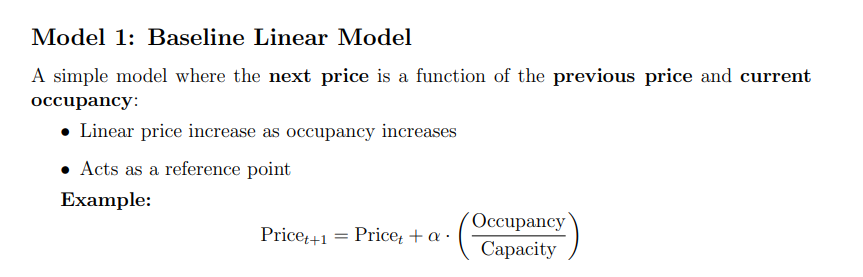

In [12]:
import datetime

delta_window = (
    data_with_time.windowby(
        pw.this.t,
        instance = pw.this.day,
        window = pw.temporal.tumbling(datetime.timedelta(days=1)),
        behavior = pw.temporal.exactly_once_behavior()
    )
    .reduce(
        t = pw.this._pw_window_end,
        occ_max=pw.reducers.max(pw.this.Occupancy),
        occ_min=pw.reducers.min(pw.this.Occupancy),
        cap = pw.reducers.max(pw.this.Capacity)
    )
    .with_columns(
        price=10 + (pw.this.occ_max - pw.this.occ_min)/pw.this.cap  # using a formula for price prediction
    )
 )

# Visualization of daily price fluctuations using bokeh plot

In [27]:
pn.extension()

def price_plotter(source):
  fig = bokeh.plotting.figure(
      height = 400,
      width = 800,
      title = "Daily Parking Price",
      x_axis_type = 'datetime',
  )
  fig.line("t","price", source=source, line_width=2, color='navy')
  fig.circle("t","price", source=source, size=6, color="red")

  return fig

viz = delta_window.plot(price_plotter, sorting_col="t")

pn.Column(viz).servable()

Column
    [0] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)

In [28]:
%%capture --no-display
pw.run()

Output()

 # --------------------------------------------------------------------------------------------------------------------------------------

In [15]:
data["VehicleType"].value_counts()

,count
VehicleType,
car,11166
bike,3624
truck,1809
cycle,1769


In [16]:
data.TrafficConditionNearby.value_counts()

,count
TrafficConditionNearby,
low,7793
average,6438
high,4137


# Encoding Categorical values

In [17]:
data['TrafficConditionNearby'] = data['TrafficConditionNearby'].map({'low':1, 'average':2, 'high':3})
data.sample(5)

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Timestamp
17539,14372,Others-CCCPS202,2937,26.147491,91.727997,1176,cycle,2,7,0,16-12-2016,13:56:00,2016-12-16 13:56:00
2001,13262,Others-CCCPS202,2937,26.147491,91.727997,1179,car,1,2,0,11-10-2016,16:01:00,2016-10-11 16:01:00
3774,6829,BHMNCPNST01,485,26.140048,91.730972,322,car,1,2,0,18-10-2016,16:27:00,2016-10-18 16:27:00
260,1330,BHMBCCTHL01,387,26.144495,91.736205,146,car,1,2,0,05-10-2016,07:57:00,2016-10-05 07:57:00
580,14473,Others-CCCPS8,1322,26.147549,91.727995,683,truck,2,4,0,06-10-2016,10:30:00,2016-10-06 10:30:00


In [18]:
data['VehicleType'] = data['VehicleType'].map({'cycle':1, 'bike':2, 'car':3, 'truck':4})
data.sample(5)

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Timestamp
16871,9077,Broad Street,690,26.137958,91.740994,256,3,1,1,0,14-12-2016,08:03:00,2016-12-14 08:03:00
5373,17439,Shopping,1920,26.150504,91.733531,1110,3,1,3,0,27-10-2016,10:25:00,2016-10-27 10:25:00
328,1335,BHMBCCTHL01,387,26.144495,91.736205,337,2,3,5,0,05-10-2016,10:30:00,2016-10-05 10:30:00
17874,11772,Others-CCCPS119a,2803,26.147541,91.727970,1021,1,2,4,1,18-12-2016,08:03:00,2016-12-18 08:03:00
6417,1770,BHMBCCTHL01,387,26.144495,91.736205,241,2,3,7,0,31-10-2016,12:00:00,2016-10-31 12:00:00


In [19]:
data.columns

Index(['ID', 'SystemCodeNumber', 'Capacity', 'Latitude', 'Longitude',
       'Occupancy', 'VehicleType', 'TrafficConditionNearby', 'QueueLength',
       'IsSpecialDay', 'LastUpdatedDate', 'LastUpdatedTime', 'Timestamp'],
      dtype='object')

# Feature Extaction and new_data

In [20]:
# creating New data

data[['Timestamp','Occupancy','Capacity','VehicleType','TrafficConditionNearby','QueueLength','IsSpecialDay']].to_csv('demand_price_table.csv', index=False)

# New_Data Schema Structure

In [21]:
class DemandPriceParkingSchema(pw.Schema):
  Timestamp : str
  Occupancy : int
  Capacity  : int
  VehicleType : int
  TrafficConditionNearby : int
  QueueLength : int
  IsSpecialDay : int

# Real time Data Ingestion

In [22]:
new_data = pw.demo.replay_csv('demand_price_table.csv', schema=DemandPriceParkingSchema, input_rate=1000)

In [23]:
# creating new column for timestamp

# format
fmt = "%Y-%m-%d %H:%M:%S"

data_with_time = new_data.with_columns(
    t = new_data.Timestamp.dt.strptime(fmt),
    day = new_data.Timestamp.dt.strptime(fmt).dt.strftime("%Y-%m-%dT00:00:00"))

# making price prediction through Demand

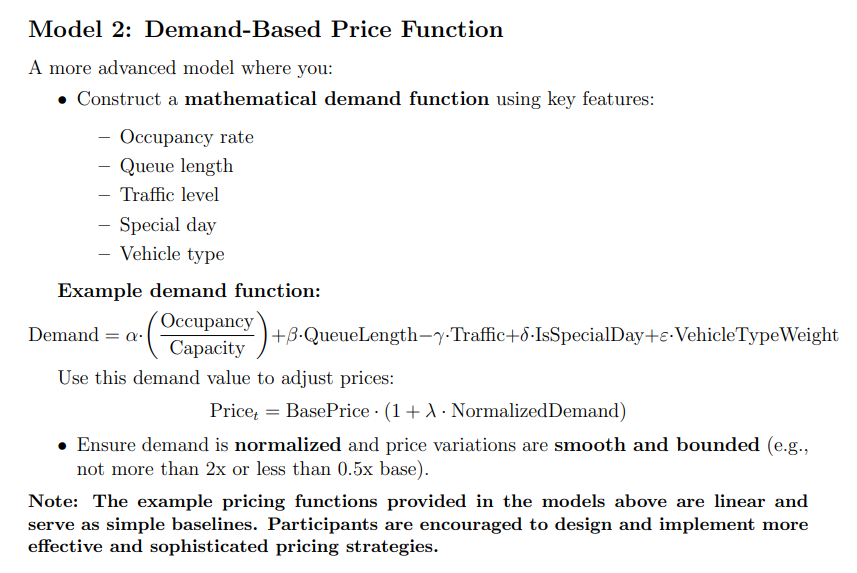

In [24]:
import datetime

delta_window_2 = (
    data_with_time.windowby(
        pw.this.t,
        instance = pw.this.day,
        window = pw.temporal.tumbling(datetime.timedelta(days=1)),
        behavior = pw.temporal.exactly_once_behavior()
    )
    .reduce(
        t = pw.this._pw_window_end,
        occ_max=pw.reducers.max(pw.this.Occupancy),
        occ_min=pw.reducers.min(pw.this.Occupancy),
        cap = pw.reducers.max(pw.this.Capacity),
        queue = pw.reducers.any(pw.this.QueueLength),
        traffic = pw.reducers.any(pw.this.TrafficConditionNearby),
        spday = pw.reducers.any(pw.this.IsSpecialDay),
        vehicle = pw.reducers.any(pw.this.VehicleType)
    )
    .with_columns(
        price=10*(1 + (((pw.this.occ_max - pw.this.occ_min)/pw.this.cap) + pw.this.queue - pw.this.traffic + pw.this.spday + pw.this.vehicle)
    )
 ))

# Visualization of daily price fluctuations using bokeh plot

In [25]:
pn.extension()

def demand_price_plotter(source):
  fig = bokeh.plotting.figure(
      height = 400,
      width = 800,
      title = "Demand Parking Price",
      x_axis_type = 'datetime',
  )
  fig.line("t","price", source=source, line_width=2, color='navy')
  fig.circle("t","price", source=source, size=6, color="red")

  return fig

viz = delta_window_2.plot(demand_price_plotter, sorting_col="t")

pn.Column(viz).servable()

Column
    [0] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)

In [26]:
%%capture --no-display
pw.run()

Output()